In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Warmup 

Without using NumPy, write a python function that takes in a list of lists, and returns a list of lists of the same dimensions, where all of the elements are increased by 1.

```python
lol = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_function(lol)
```
```terminal
>> [[2, 3, 4], [5, 6, 7], [8, 9, 10], [11, 12, 13]]
```

In [2]:
# inplace operation
def my_function(x):
    for i in range(len(x)):
        for j in range(len(x[i])):
            x[i][j] += 1

    return x

In [3]:
%%timeit
lol = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_function(lol)

2.08 µs ± 6.26 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
# try appending into a new list
def my_function(x):
    newlist = []
    for lists in x:
        innerlist = []
        for ele in lists:
            innerlist.append(ele)
        newlist.append(innerlist)

    return newlist

In [7]:
%%timeit
# check the execution run time using %%timeit 
lol = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_function(lol)

1.19 µs ± 3.82 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
# how to do that with numpy?
lol = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
lol

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [9]:
lol + 1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10],
       [11, 12, 13]])

In [10]:
lol.dtype

dtype('int64')

In [11]:
%%timeit
# check the execution run time using %%timeit 
lol + 1

541 ns ± 0.974 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


###### Advanced Challenge:

How to do that for arbitrary nested lists?

```python
lol = [[1, 2, 3], [4, [5, 6]], [[[7], 8, 9], [10, 11, 12]]]
my_function(lol)
```
```terminal
>> [[2, 3, 4], [5, [6, 7]], [[[8], 9, 10], [11, 12, 13]]]
```
Hint: 
* check if the element is a list using ```isinstance(element,list)```
* think of recursive functions

In [12]:
def my_function(item):
    if isinstance(item, list):
        return [my_function(x) for x in item]
    else:
        return item + 1

In [13]:
lol = [[1, 2, 3], [4, [5, 6]], [[[7], 8, 9], [10, 11, 12]]]
my_function(lol)

[[2, 3, 4], [5, [6, 7]], [[[8], 9, 10], [11, 12, 13]]]

---
# numpy

+ apply single operations on entire ranges of elements (elementwise operations)
- no for-loops or nested for-loops needed
- used by many higher level libraries (Pandas, Scikit Learn, Scipy)
- built on top of the C programming language (implemented using Python's C API)
+ array slicing through multiple dimensions
+ great for working with images and deep learning

### Creating arrays - many ways!

#### From a list
+ ```np.array(< some_list >, dtype = < type >```)

In [14]:
x = np.array([1, 2, 3], dtype=str)
x.dtype
x

array(['1', '2', '3'], dtype='<U1')

In [15]:
np.array([1]).dtype

dtype('int64')

In [16]:
np.iinfo('int64') 

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [17]:
np.array([300], dtype=np.uint16)

array([300], dtype=uint16)

In [18]:
x = np.array([[[123, 123], [23, 45]]])
x

array([[[123, 123],
        [ 23,  45]]])

In [19]:
x.shape

(1, 2, 2)

#### From a DataFrame
Pandas is built on top of Numpy
--> To make a pd.DataFrame or a pd.Series as a numpy array: 

- `df.to_numpy()`
- `df[col].to_numpy()`

In [20]:
df = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df

,A,B
0,1,3
1,2,4


In [21]:
df['B'].to_numpy()

array([3, 4])

#### From Scratch
+ ```np.zeros( )```
+ ```np.ones( )```
+ ```np.full( )```

In [22]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [23]:
np.ones((2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [24]:
np.full((2, 5),7)

array([[7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7]])

#### From Range
+ ```np.arange ( )```
+ ```np.linspace( )```

In [25]:
np.arange(2, 34, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

In [26]:
np.linspace(2, 34, 10)

array([ 2.        ,  5.55555556,  9.11111111, 12.66666667, 16.22222222,
       19.77777778, 23.33333333, 26.88888889, 30.44444444, 34.        ])

In [27]:
np.logspace(1, 4, 4)

array([   10.,   100.,  1000., 10000.])

In [28]:
np.logspace(1, 15, 15, base=2)

array([2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01, 3.2000e+01,
       6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02, 1.0240e+03,
       2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04, 3.2768e+04])

#### From Random Data
Remember all the distributions functions
+ ```np.random.rand()```
+ ```np.random.normal()```

In [29]:
x = np.random.normal(size=18)
x

array([-0.57462233, -1.37919359,  0.00862589, -0.41708155,  0.57887121,
        0.0299548 , -0.50067648, -0.52713228,  0.99628688, -0.34957263,
       -0.46621364,  0.13490627,  1.1538558 ,  0.40184147, -0.42000536,
        0.12359969, -0.71833423, -0.63699273])

In [30]:
x.shape

(18,)

## Reshaping an array

In [31]:
x = x.reshape((3, 6))
x

array([[-0.57462233, -1.37919359,  0.00862589, -0.41708155,  0.57887121,
         0.0299548 ],
       [-0.50067648, -0.52713228,  0.99628688, -0.34957263, -0.46621364,
         0.13490627],
       [ 1.1538558 ,  0.40184147, -0.42000536,  0.12359969, -0.71833423,
        -0.63699273]])

In [32]:
x.reshape(9,-1)

array([[-0.57462233, -1.37919359],
       [ 0.00862589, -0.41708155],
       [ 0.57887121,  0.0299548 ],
       [-0.50067648, -0.52713228],
       [ 0.99628688, -0.34957263],
       [-0.46621364,  0.13490627],
       [ 1.1538558 ,  0.40184147],
       [-0.42000536,  0.12359969],
       [-0.71833423, -0.63699273]])

In [33]:
arr = np.arange(0,120)
arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [34]:
arr.reshape(3,20,2)

array([[[  0,   1],
        [  2,   3],
        [  4,   5],
        [  6,   7],
        [  8,   9],
        [ 10,  11],
        [ 12,  13],
        [ 14,  15],
        [ 16,  17],
        [ 18,  19],
        [ 20,  21],
        [ 22,  23],
        [ 24,  25],
        [ 26,  27],
        [ 28,  29],
        [ 30,  31],
        [ 32,  33],
        [ 34,  35],
        [ 36,  37],
        [ 38,  39]],

       [[ 40,  41],
        [ 42,  43],
        [ 44,  45],
        [ 46,  47],
        [ 48,  49],
        [ 50,  51],
        [ 52,  53],
        [ 54,  55],
        [ 56,  57],
        [ 58,  59],
        [ 60,  61],
        [ 62,  63],
        [ 64,  65],
        [ 66,  67],
        [ 68,  69],
        [ 70,  71],
        [ 72,  73],
        [ 74,  75],
        [ 76,  77],
        [ 78,  79]],

       [[ 80,  81],
        [ 82,  83],
        [ 84,  85],
        [ 86,  87],
        [ 88,  89],
        [ 90,  91],
        [ 92,  93],
        [ 94,  95],
        [ 96,  97],
        [ 98,  9

In [35]:
arr.reshape(3,40)

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119]])

In [36]:
arr.reshape(20,-1)

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41],
       [ 42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53],
       [ 54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77],
       [ 78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101],
       [102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113],
       [114, 115, 116, 117, 118, 119]])

In [37]:
arr.reshape(-1, 6, 5).shape

(4, 6, 5)

In [38]:
arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

## Accessing and Slicing in 2D arrays and more
![](https://media.geeksforgeeks.org/wp-content/uploads/Numpy1.jpg)

```
array[START:END:INTERVAL, START:END:INTERVAL, ...]
```

#### Let's replicate that grid

In [39]:
grid = np.arange(0, 36)
grid = grid.reshape((6, 6))
grid

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

**Access a specific element, 4**

In [40]:
# grid[start:end:interval, start:end:interval]
grid[0,4]
# grid[0][4]

4

**Access the first row**

In [41]:
grid[0]

array([0, 1, 2, 3, 4, 5])

**Access the fourth element in each row**

In [42]:
grid[:,3]

array([ 3,  9, 15, 21, 27, 33])

**Replace values of first two rows with zeros**

In [43]:
grid[:2] = 0 
grid

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

---
## Fun with Flags (and Numpy)

**In the beginning there was darkness**

+ Start with a 120 x 180 all black image

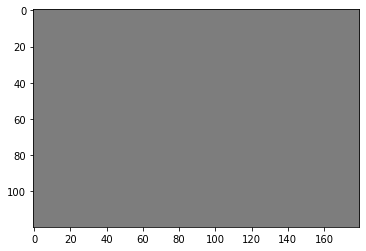

In [44]:
flag = np.full((120, 180, 3), 125,dtype='uint8')
plt.imshow(flag)

In [45]:
flag

array([[[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       ...,

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]]

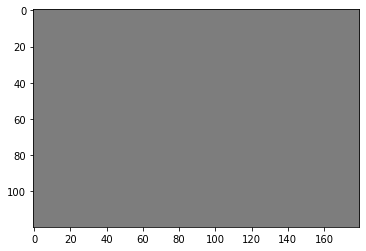

In [47]:
# if you want to display your array as 3 sets(channels) of 120*180 pixels/values
flag.reshape(3,120,180)
# but for displaying the array using imshow you must have the channels(3) in the last dimension
# so if you want to plot using the above aray it needs to be again reshaped
plt.imshow(flag.reshape(3,120,180).reshape(120,180,3))

In [48]:
# RED, GREEN, BLUE values (or RGB)
flag[0, 0]

array([125, 125, 125], dtype=uint8)

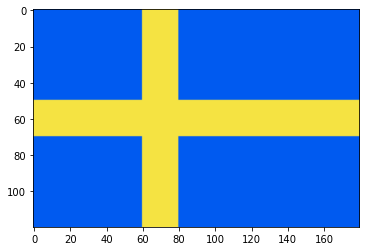

In [49]:
# flag[width, height, color_channel] = [RED, GREEN, BLUE]
# choose different rgb colors from https://www.rapidtables.com/web/color/RGB_Color.html

# rgb color for blue [0,90,240], yellow [245,227,66]
# Sweden flag

flag[:,:,:] = [0,90,240]
flag[:,60:80,:] = [245,227,66]
flag[50:70,:] = [245,227,66]
plt.imshow(flag)
plt.imsave('sweden.png',flag)

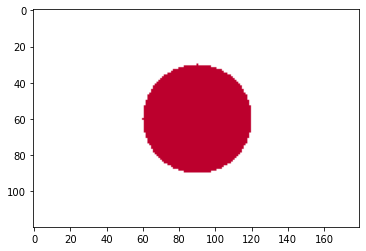

In [50]:
# Japan flag
from math import sqrt
flag = np.zeros(shape = (120, 180, 3), dtype=np.uint8)
flag[:,:,:] = 255
x = 60
y = 90
#radius
r = 30
#location of circle
for i in range(30,90) :
    for j in range(60, 120) :
        distance = sqrt((i - x )**2 + (j - y)**2)
        if distance <= r :
            flag[i, j, 0] = 188
            flag[i, j, 1] = 0
            flag[i, j, 2] = 45
plt.imshow(flag)

---
## Exercise

- start with a scandinavian flag
- do you come up with other flags?
- Advanced: Can you draw the Japanese flag?

Post your code in slack for the others to try out :) 

[You can choose different rgb colors from here](https://www.rapidtables.com/web/color/RGB_Color.html)

## References
- [Numpy docs](https://numpy.org/devdocs/user/whatisnumpy.html)

- [Introduction to Numpy Broadcasting](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy)

- [Data Types in numpy](https://numpy.org/doc/stable/user/basics.types.html)

- [Generative Art examples from Kristian on github](https://github.com/krother/generative_art)

- [What is `numpy.empty()`?](https://www.sharpsightlabs.com/blog/numpy-empty/)
